# Requirements

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import f1_score, r2_score, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
import missingno as msno
from xgboost import XGBRegressor, XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Laboratory Exercise - Run Mode (8 points)

## The Vacation Preferences Dataset
The dataset contains information about individuals and their vacation preferences. It includes details such as age, gender, income, and education level. It also provides insights into their vacation habits, like the number of vacations taken each year, preferred activities (such as hiking, swimming, skiing, or sunbathing), and their budget for vacations. Other information includes the type of place they live in (urban, suburban, or rural), how far they live from mountains and beaches, and their favorite season for vacations (summer, winter, spring, or fall). The dataset also contains information whether they have pets and if they are concerned about the environment. All these features serve as input variables for predictive modeling. The 'Preference' attribute serves as the target variable, where 1 represents preference for mountains, 0 for beaches.

Load the dataset into a `pandas` data frame.

In [154]:
import pandas as pd

data = pd.read_csv('vacation_preferences_data.csv')
data

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,male,71477,bachelor,9,skiing,2477,urban,175.0,267,summer,0,1,1
1,69.0,male,88740,master,1,swimming,4777,suburban,NaN,190,fall,0,1,0
2,46.0,female,46562,master,0,skiing,1469,urban,71.0,280,winter,0,0,1
3,32.0,non-binary,99044,high school,6,hiking,1482,rural,31.0,255,summer,1,0,1
4,60.0,female,106583,high school,5,sunbathing,516,suburban,23.0,151,winter,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67.0,female,85325,master,3,hiking,1762,suburban,51.0,262,fall,1,0,1
52440,37.0,female,110346,bachelor,7,swimming,1676,urban,259.0,84,spring,1,0,0
52441,53.0,non-binary,71080,doctorate,7,swimming,3877,urban,NaN,27,fall,0,1,0
52442,40.0,female,75174,doctorate,9,swimming,4620,suburban,173.0,10,summer,0,1,0


Preprocess the input and the output variables appropriately.

In [155]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Education_Level'] = encoder.fit_transform(data['Education_Level'])
data['Preferred_Activities'] = encoder.fit_transform(data['Preferred_Activities'])
data['Location'] = encoder.fit_transform(data['Location'])
data['Favorite_Season'] = encoder.fit_transform(data['Favorite_Season'])

In [156]:
data

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,1,71477,0,9,1,2477,2,175.0,267,2,0,1,1
1,69.0,1,88740,3,1,3,4777,1,NaN,190,0,0,1,0
2,46.0,0,46562,3,0,1,1469,2,71.0,280,3,0,0,1
3,32.0,2,99044,2,6,0,1482,0,31.0,255,2,1,0,1
4,60.0,0,106583,2,5,2,516,1,23.0,151,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67.0,0,85325,3,3,0,1762,1,51.0,262,0,1,0,1
52440,37.0,0,110346,0,7,3,1676,2,259.0,84,1,1,0,0
52441,53.0,2,71080,1,7,3,3877,2,NaN,27,0,0,1,0
52442,40.0,0,75174,1,9,3,4620,1,173.0,10,2,0,1,0


Explore the dataset using visualizations of your choice.

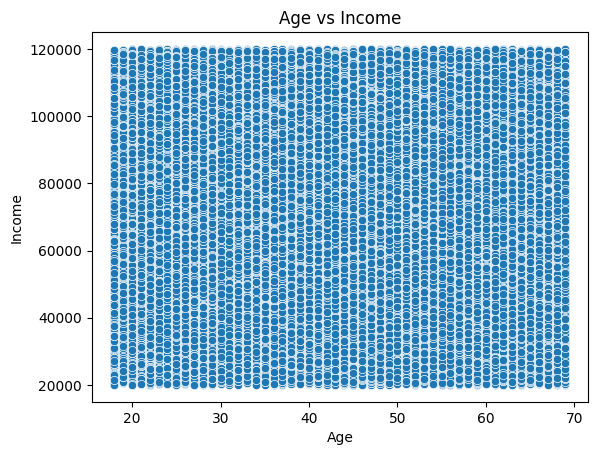

In [157]:
sns.scatterplot(x=data['Age'], y=data['Income'])
plt.title('Age vs Income')
plt.show()

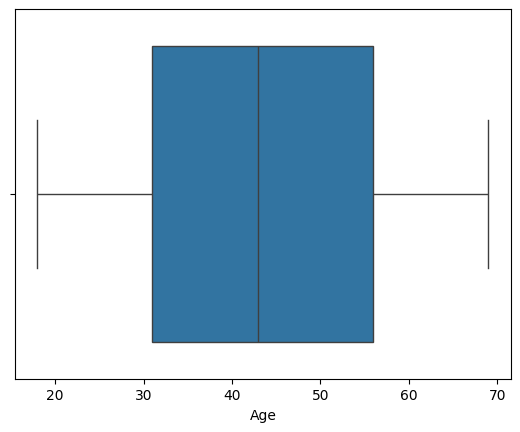

In [158]:
sns.boxplot(x=data['Age'])
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Education_Level'}>],
       [<Axes: title={'center': 'Travel_Frequency'}>,
        <Axes: title={'center': 'Preferred_Activities'}>,
        <Axes: title={'center': 'Vacation_Budget'}>,
        <Axes: title={'center': 'Location'}>],
       [<Axes: title={'center': 'Proximity_to_Mountains'}>,
        <Axes: title={'center': 'Proximity_to_Beaches'}>,
        <Axes: title={'center': 'Favorite_Season'}>,
        <Axes: title={'center': 'Pets'}>],
       [<Axes: title={'center': 'Environmental_Concerns'}>,
        <Axes: title={'center': 'Preference'}>, <Axes: >, <Axes: >]],
      dtype=object)

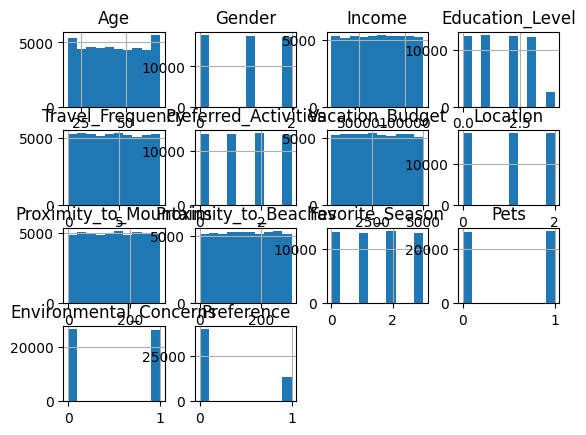

In [9]:
data.hist()

Check if the dataset is balanced.

In [159]:
data['Preference'].value_counts()

Preference
0    39296
1    13148
Name: count, dtype: int64

<Axes: xlabel='Preference', ylabel='count'>

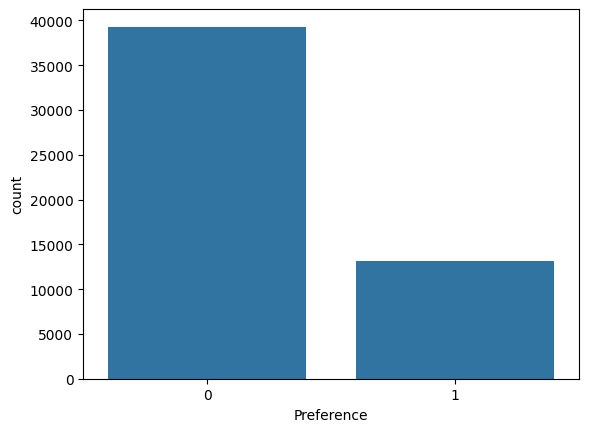

In [160]:
sns.countplot(x='Preference', data = data)

In [161]:
data['Preference'].value_counts()

Preference
0    39296
1    13148
Name: count, dtype: int64

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [162]:
data.isnull().sum()

Age                       5244
Gender                       0
Income                       0
Education_Level              0
Travel_Frequency             0
Preferred_Activities         0
Vacation_Budget              0
Location                     0
Proximity_to_Mountains    2622
Proximity_to_Beaches         0
Favorite_Season              0
Pets                         0
Environmental_Concerns       0
Preference                   0
dtype: int64

In [163]:
data

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,1,71477,0,9,1,2477,2,175.0,267,2,0,1,1
1,69.0,1,88740,3,1,3,4777,1,NaN,190,0,0,1,0
2,46.0,0,46562,3,0,1,1469,2,71.0,280,3,0,0,1
3,32.0,2,99044,2,6,0,1482,0,31.0,255,2,1,0,1
4,60.0,0,106583,2,5,2,516,1,23.0,151,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67.0,0,85325,3,3,0,1762,1,51.0,262,0,1,0,1
52440,37.0,0,110346,0,7,3,1676,2,259.0,84,1,1,0,0
52441,53.0,2,71080,1,7,3,3877,2,NaN,27,0,0,1,0
52442,40.0,0,75174,1,9,3,4620,1,173.0,10,2,0,1,0


In [164]:
missing_percent = data.isnull().sum() / len(data) * 100

In [165]:
missing_percent

Age                       9.999237
Gender                    0.000000
Income                    0.000000
Education_Level           0.000000
Travel_Frequency          0.000000
Preferred_Activities      0.000000
Vacation_Budget           0.000000
Location                  0.000000
Proximity_to_Mountains    4.999619
Proximity_to_Beaches      0.000000
Favorite_Season           0.000000
Pets                      0.000000
Environmental_Concerns    0.000000
Preference                0.000000
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

In [166]:
import missingno as msno

<Axes: >

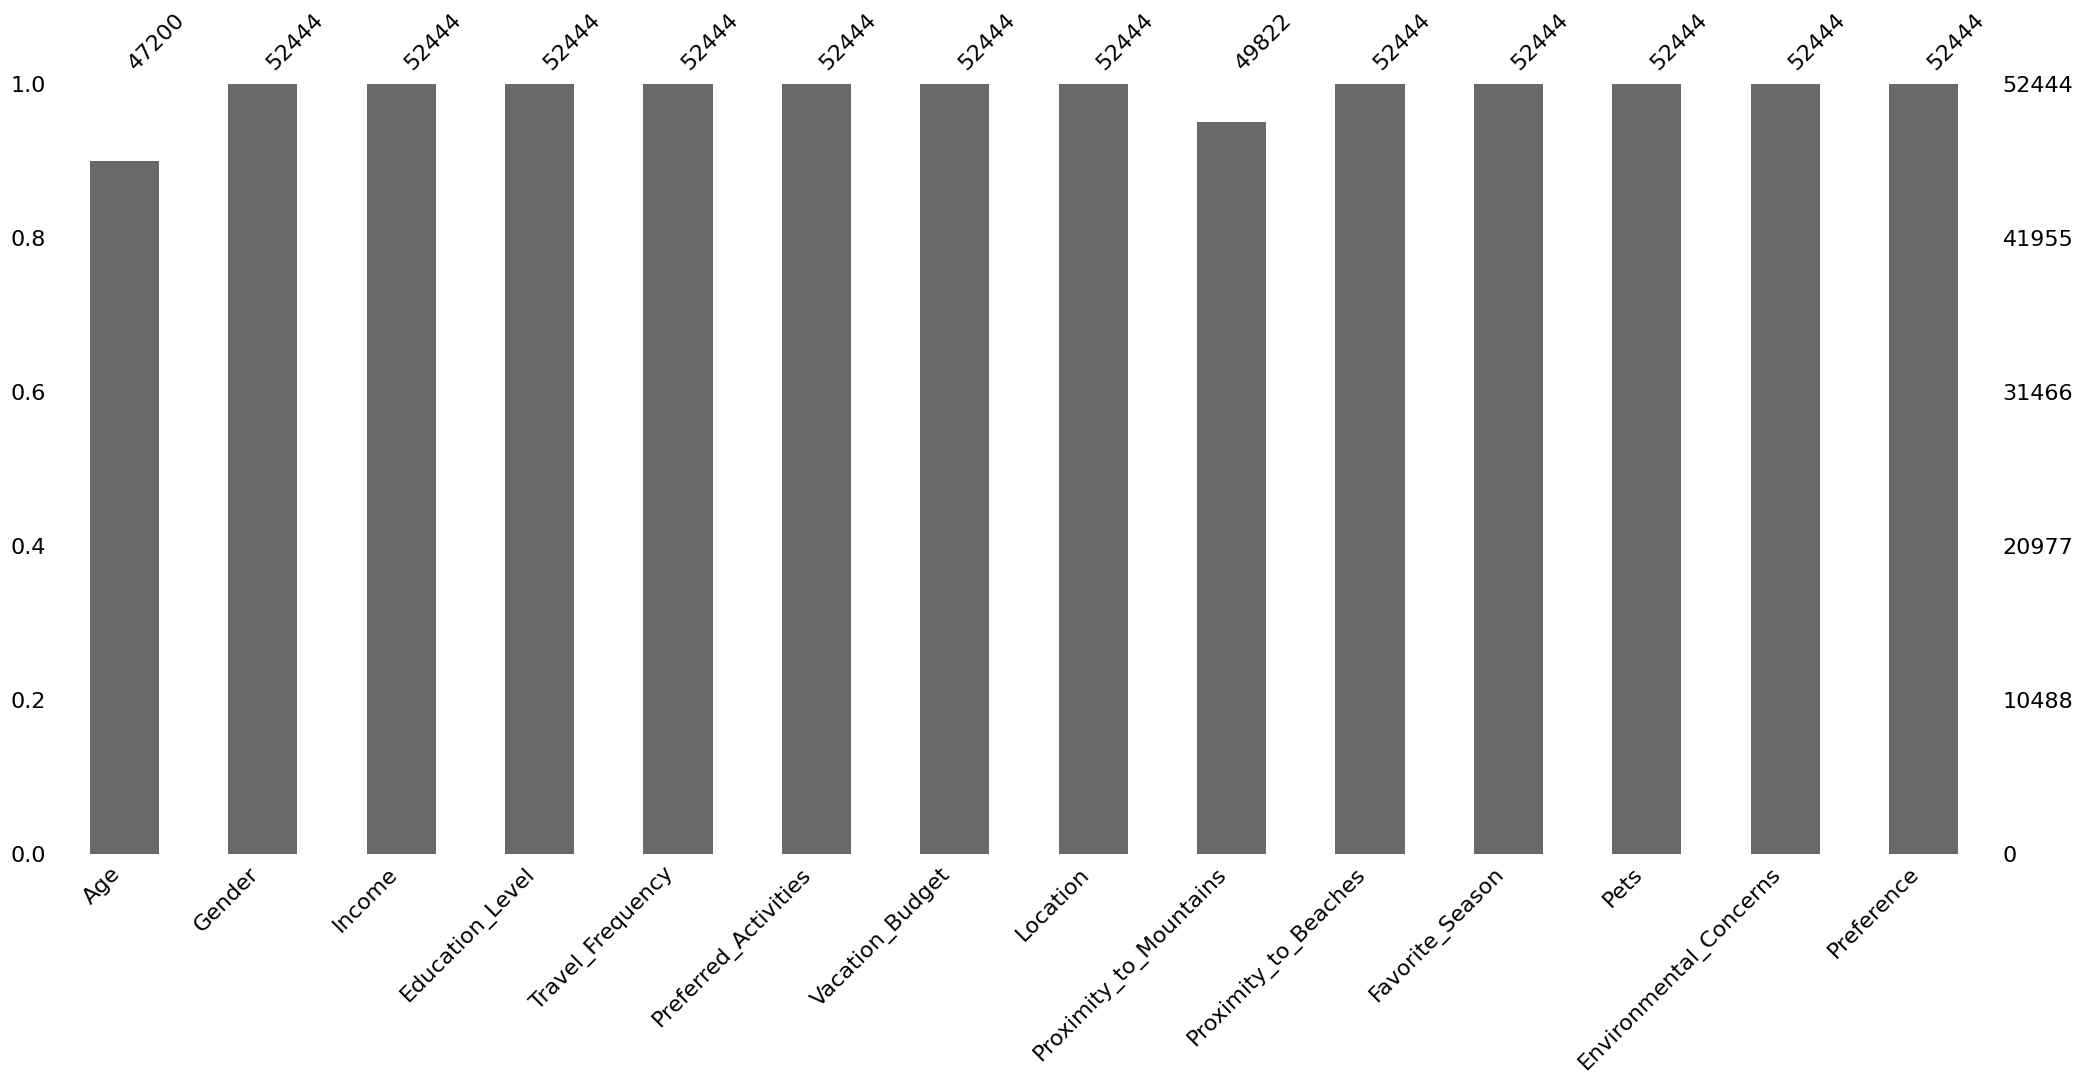

In [167]:
msno.bar(data)

<Axes: >

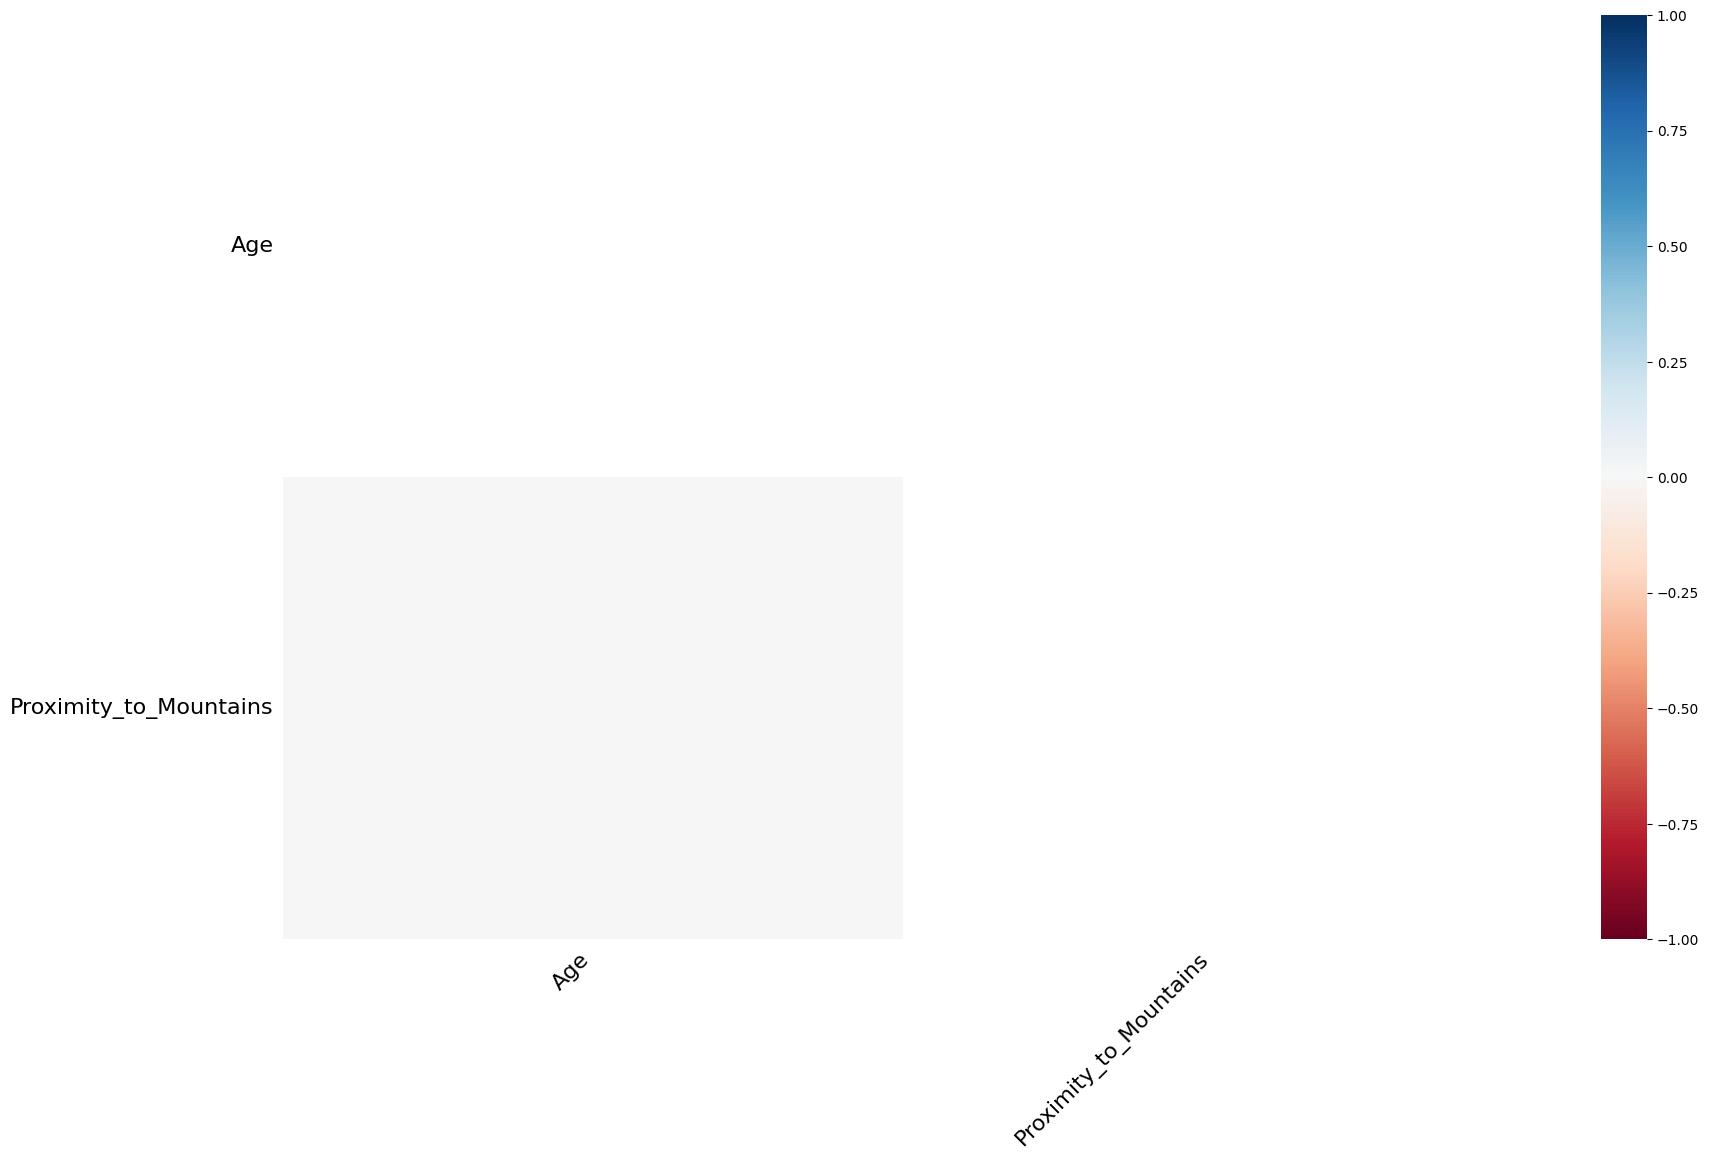

In [168]:
msno.heatmap(data)

<Axes: >

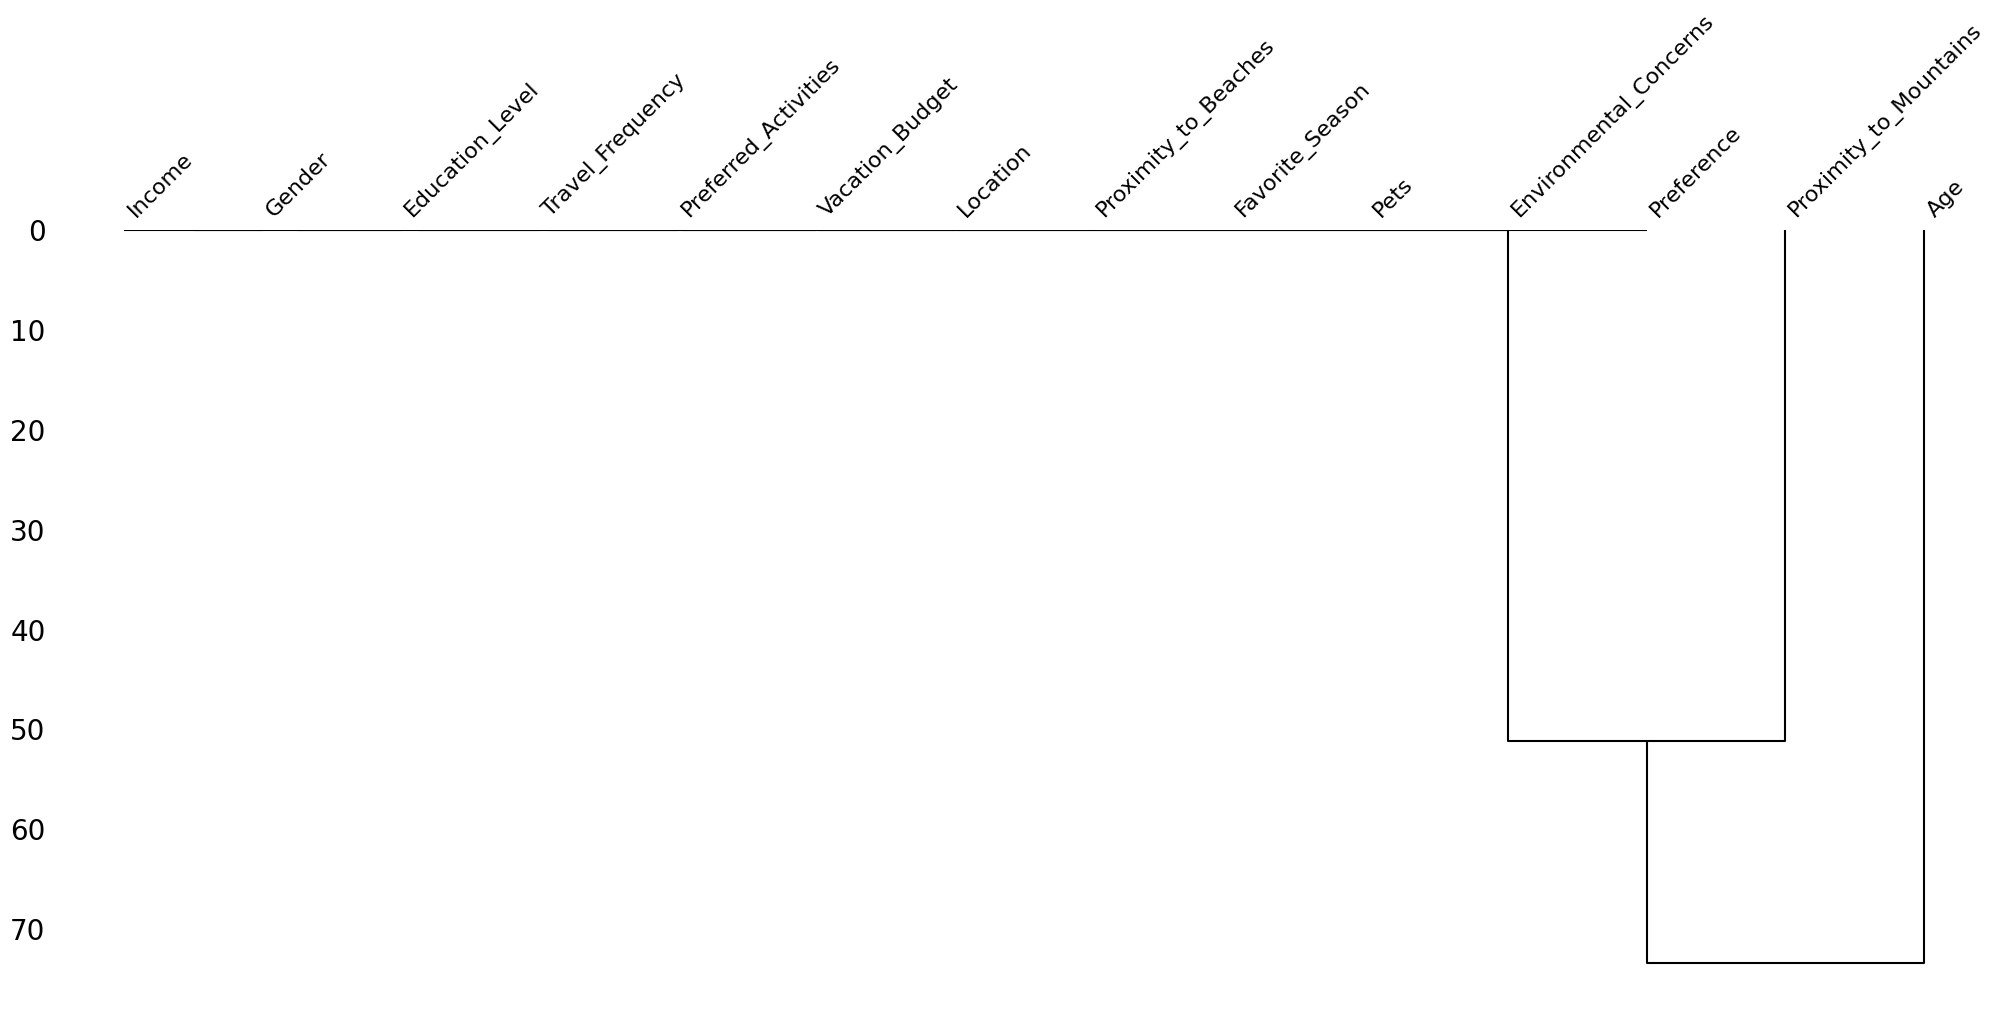

In [169]:
msno.dendrogram(data)

<Axes: >

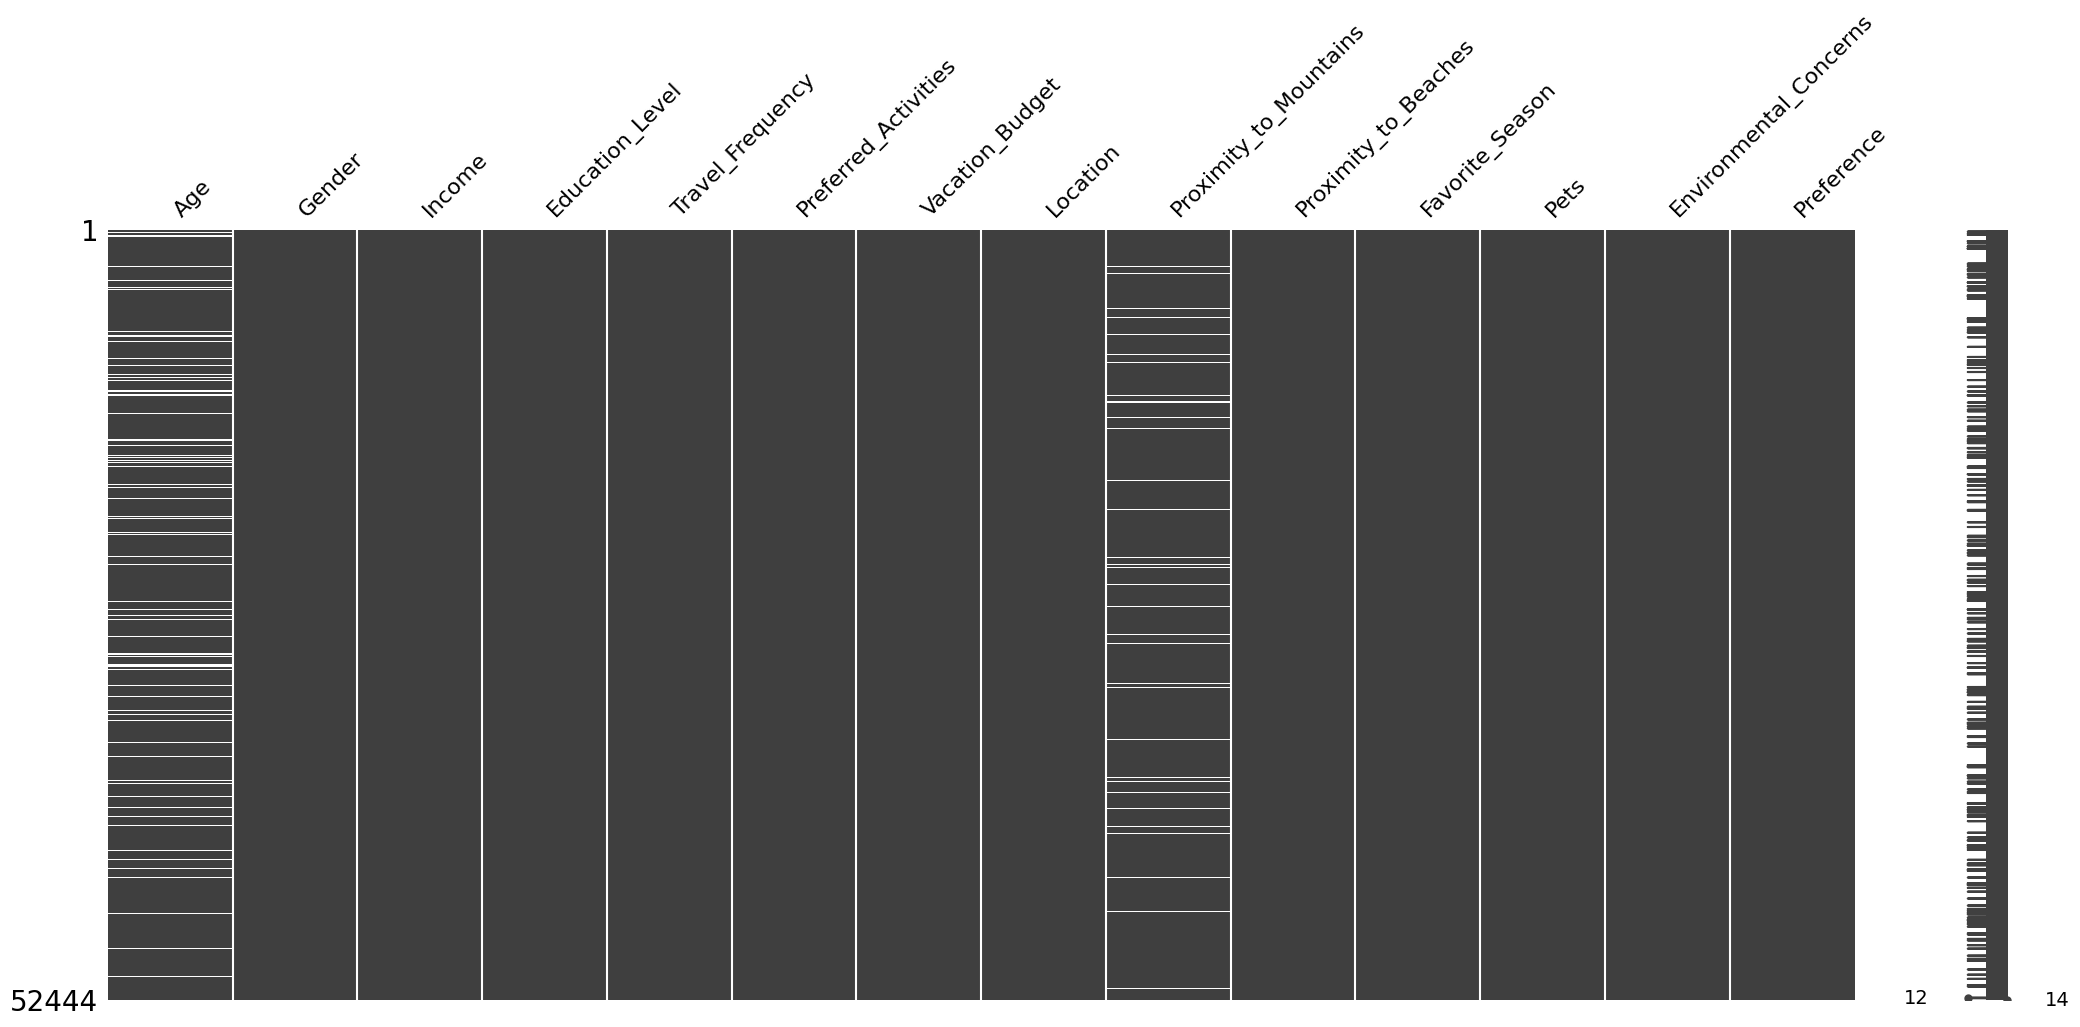

In [170]:
msno.matrix(data)

                             Age  Proximity_to_Mountains
Age                     1.000000                0.005805
Proximity_to_Mountains  0.005805                1.000000


<Axes: >

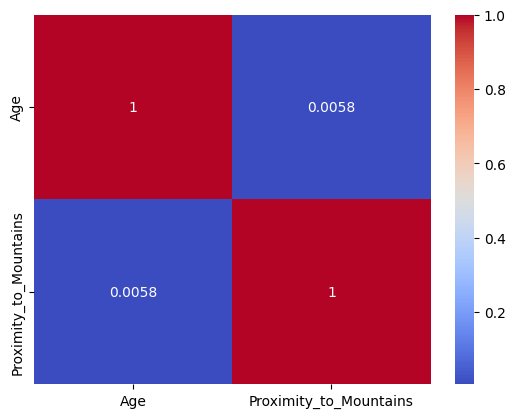

In [171]:
data_clean = data[['Age', 'Proximity_to_Mountains']].dropna()
corr_matrix = data_clean.corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [172]:
data.isnull().sum()

Age                       5244
Gender                       0
Income                       0
Education_Level              0
Travel_Frequency             0
Preferred_Activities         0
Vacation_Budget              0
Location                     0
Proximity_to_Mountains    2622
Proximity_to_Beaches         0
Favorite_Season              0
Pets                         0
Environmental_Concerns       0
Preference                   0
dtype: int64

<Axes: ylabel='Frequency'>

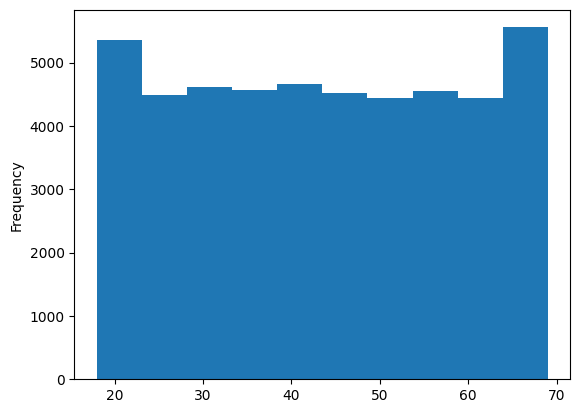

In [173]:
data.Age.plot.hist()

In [174]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Proximity_to_Mountains']])

In [175]:
imputer = KNNImputer(n_neighbors=3)

In [176]:
imputed_data = imputer.fit_transform(scaled_data)

In [177]:
imputed_data = scaler.inverse_transform(imputed_data)

In [178]:
data[['Age', 'Proximity_to_Mountains']] = imputed_data

In [179]:
data.isnull().sum()

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64

In [180]:
data

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,1,71477,0,9,1,2477,2,175.000000,267,2,0,1,1
1,69.0,1,88740,3,1,3,4777,1,252.666667,190,0,0,1,0
2,46.0,0,46562,3,0,1,1469,2,71.000000,280,3,0,0,1
3,32.0,2,99044,2,6,0,1482,0,31.000000,255,2,1,0,1
4,60.0,0,106583,2,5,2,516,1,23.000000,151,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67.0,0,85325,3,3,0,1762,1,51.000000,262,0,1,0,1
52440,37.0,0,110346,0,7,3,1676,2,259.000000,84,1,1,0,0
52441,53.0,2,71080,1,7,3,3877,2,100.333333,27,0,0,1,0
52442,40.0,0,75174,1,9,3,4620,1,173.000000,10,2,0,1,0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [181]:
target = 'Preference'
X = data.drop(target, axis=1)
Y = data[target]

In [182]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [183]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [189]:
model = CatBoostClassifier(max_depth=3, learning_rate=0.1, n_estimators=5)

In [190]:
model.fit(X_train_scaled, Y_train)

0:	learn: 0.6232174	total: 16.5ms	remaining: 66ms
1:	learn: 0.5654493	total: 144ms	remaining: 216ms
2:	learn: 0.5170805	total: 187ms	remaining: 125ms
3:	learn: 0.4742217	total: 212ms	remaining: 53.1ms
4:	learn: 0.4380262	total: 228ms	remaining: 0us


Use the trained model to make predictions for the test set.

In [191]:
y_pred = model.predict(X_test_scaled)

Assess the performance of the model by using different classification metrics.

In [192]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(Y_test, y_pred))
accuracy_score(Y_test, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      7882
           1       0.79      0.98      0.88      2607

    accuracy                           0.93     10489
   macro avg       0.89      0.95      0.91     10489
weighted avg       0.94      0.93      0.93     10489



0.9308799694918486

In [194]:
model = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=5)
model.fit(X_train_scaled, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [195]:
y_pred = model.predict(X_test_scaled)

In [196]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      7882
           1       0.99      0.58      0.73      2607

    accuracy                           0.89     10489
   macro avg       0.93      0.79      0.83     10489
weighted avg       0.91      0.89      0.88     10489



In [209]:
model = DecisionTreeClassifier(max_depth=3, min_samples_split=5)
model.fit(X_train_scaled, Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

In [210]:
y_pred = model.predict(X_test_scaled)

In [211]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7882
           1       0.86      0.83      0.85      2607

    accuracy                           0.92     10489
   macro avg       0.90      0.89      0.90     10489
weighted avg       0.92      0.92      0.92     10489



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [226]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [227]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [228]:
rkf = RepeatedKFold(n_splits=5)
rkf.get_n_splits(X, Y)

50

In [229]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier()
param_grid ={
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 10, 15]
}

cv = GridSearchCV(estimator=model,param_grid=param_grid,cv=rkf)
cv.fit(X_train_scaled, Y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [5, 10, 15]})

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [230]:
cv.best_score_

0.9897667276140644

In [231]:
model = cv.best_estimator_

In [232]:
y_pred = model.predict(X_test)

In [233]:
print(classification_report(Y_test, y_pred))
accuracy_score(Y_test,y_pred)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4012
           1       1.00      0.01      0.01      1233

    accuracy                           0.77      5245
   macro avg       0.88      0.50      0.44      5245
weighted avg       0.82      0.77      0.67      5245



0.7664442326024785